In [40]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns
import ast
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
df_IND = df[df['job_country'] == 'India']
df_skills = df_IND.explode('job_skills')
df_skills[['job_title','job_skills']]
df_skills_count = df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skills_count


,job_skills,job_title_short,skill_count
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
389,esquisse,Data Scientist,1
887,node.js,Senior Data Analyst,1
753,matlab,Cloud Engineer,1
411,fastapi,Cloud Engineer,1


In [11]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles=sorted(job_titles[0:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

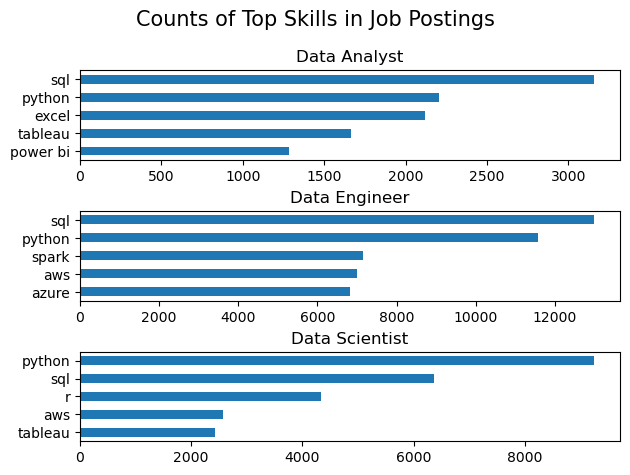

In [15]:
fig, ax = plt.subplots(len(job_titles),1)
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel("")
    ax[i].legend().set_visible(False)
    
fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()    

In [17]:
df_job_title_count = df_IND['job_title_short'].value_counts().reset_index(name='jobs_total')

In [24]:
df_skills_perc=pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')
df_skills_perc['skill_percent'] = 100*df_skills_perc['skill_count'] / df_skills_perc['jobs_total']
df_skills_perc


,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Engineer,12993,19062,68.161788
1,python,Data Engineer,11568,19062,60.686182
2,python,Data Scientist,9248,13279,69.643798
3,spark,Data Engineer,7157,19062,37.545903
4,aws,Data Engineer,6993,19062,36.685552
...,...,...,...,...,...
1684,esquisse,Data Scientist,1,13279,0.007531
1685,node.js,Senior Data Analyst,1,1083,0.092336
1686,matlab,Cloud Engineer,1,351,0.284900
1687,fastapi,Cloud Engineer,1,351,0.284900


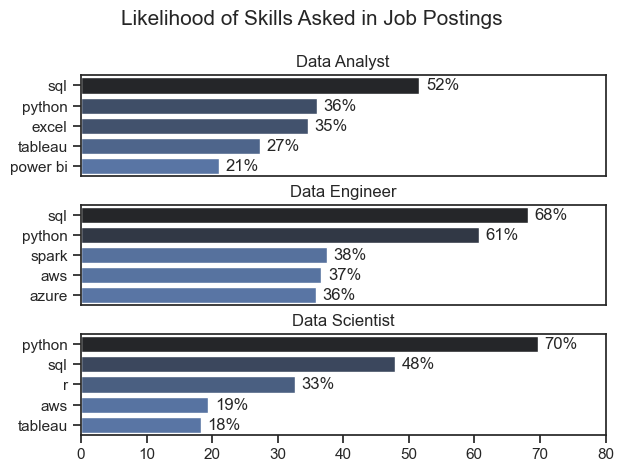

In [58]:
fig, ax = plt.subplots(len(job_titles),1)
sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
 
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    df_plot = df_plot.sort_values(by='skill_percent', ascending=False)

    # df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count',palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 80)
    
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v+1,n,f'{v:.0f}%', va='center')
    if i != len(job_titles)-1:
        ax[i].set_xticks([])    

fig.suptitle('Likelihood of Skills Asked in Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()
